<a href="https://colab.research.google.com/github/poojithasaipri/Brain-Tumor-Classification/blob/main/MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive (8).zip to archive (8).zip


In [3]:
import zipfile

zip_path = list(uploaded.keys())[0]   # automatically picks uploaded file
extract_dir = "/content/brain_tumor_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted to:", extract_dir)


Dataset extracted to: /content/brain_tumor_dataset


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [5]:
train_dir = extract_dir + "/Training"
test_dir = extract_dir + "/Testing"

print(os.listdir(train_dir))
print(os.listdir(test_dir))


['meningioma', 'glioma', 'pituitary', 'notumor']
['meningioma', 'glioma', 'pituitary', 'notumor']


In [6]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               zoom_range=0.2,
                               horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [7]:





\


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

custom_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

custom_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_custom = custom_model.fit(train_data,
                                  validation_data=test_data,
                                  epochs=10)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.4989 - loss: 1.1093 - val_accuracy: 0.7536 - val_loss: 0.6660
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.7115 - loss: 0.7186 - val_accuracy: 0.7559 - val_loss: 0.6020
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.7559 - loss: 0.5994 - val_accuracy: 0.7330 - val_loss: 0.7545
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.7882 - loss: 0.5465 - val_accuracy: 0.5584 - val_loss: 1.4769
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.8274 - loss: 0.4708 - val_accuracy: 0.7620 - val_loss: 0.6525
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8480 - loss: 0.4058 - val_accuracy: 0.7979 - val_loss: 0.5311
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.8565 - loss: 0.3955 - val_accuracy: 0.8268 - val_loss: 0.4177
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.8588 - loss: 0.3716 - val_accu

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

base_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_vgg.trainable = False

vgg_model = Sequential([
    base_vgg,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

vgg_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_vgg = vgg_model.fit(train_data,
                            validation_data=test_data,
                            epochs=5)


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 1843s 10s/step - accuracy: 0.6308 - loss: 0.9386 - val_accuracy: 0.7384 - val_loss: 0.7080
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 1861s 10s/step - accuracy: 0.8053 - loss: 0.5270 - val_accuracy: 0.7551 - val_loss: 0.6365
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 1822s 10s/step - accuracy: 0.8385 - loss: 0.4514 - val_accuracy: 0.7941 - val_loss: 0.5573
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 1870s 10s/step - accuracy: 0.8515 - loss: 0.4089 - val_accuracy: 0.8093 - val_loss: 0.5358
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 1841s 10s/step - accuracy: 0.8583 - loss: 0.3802 - val_accuracy: 0.8192 - val_loss: 0.5093


In [9]:
print("Custom CNN Accuracy:", history_custom.history['val_accuracy'][-1])
print("VGG16 Accuracy:", history_vgg.history['val_accuracy'][-1])


Custom CNN Accuracy: 0.8565980195999146
VGG16 Accuracy: 0.8192219734191895


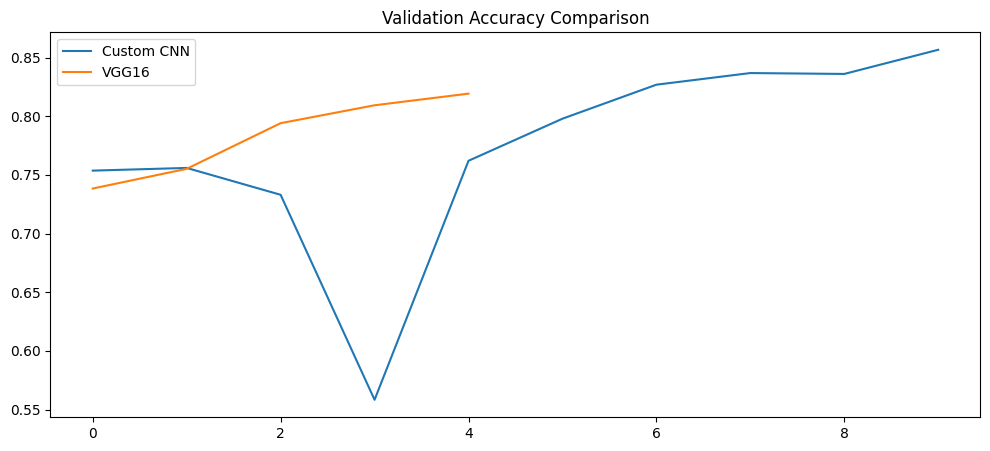

In [10]:
plt.figure(figsize=(12,5))
plt.plot(history_custom.history['val_accuracy'], label="Custom CNN")
plt.plot(history_vgg.history['val_accuracy'], label="VGG16")
plt.title("Validation Accuracy Comparison")
plt.legend()
plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 456ms/step


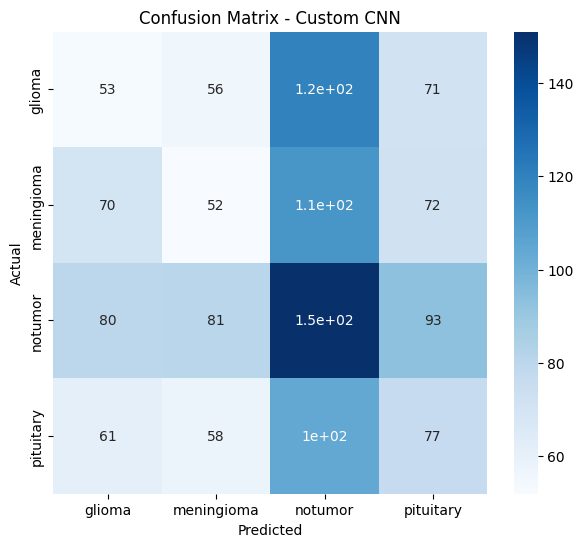

              precision    recall  f1-score   support

      glioma       0.20      0.18      0.19       300
  meningioma       0.21      0.17      0.19       306
     notumor       0.31      0.37      0.34       405
   pituitary       0.25      0.26      0.25       300

    accuracy                           0.25      1311
   macro avg       0.24      0.24      0.24      1311
weighted avg       0.25      0.25      0.25      1311



In [11]:
pred = custom_model.predict(test_data)
pred_labels = np.argmax(pred, axis=1)

true_labels = test_data.classes
class_names = list(test_data.class_indices.keys())

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - Custom CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(true_labels, pred_labels, target_names=class_names))


In [16]:
from google.colab import files
uploaded_img = files.upload()


Saving Te-pi_0011.jpg to Te-pi_0011.jpg


In [18]:
img_path = list(uploaded_img.keys())[0]

img = tf.keras.utils.load_img(img_path, target_size=(150,150))
img_arr = tf.keras.utils.img_to_array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)

prediction = custom_model.predict(img_arr)
class_index = np.argmax(prediction)
class_name = class_names[class_index]

print("Predicted Tumor Type (Custom CNN):", class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Predicted Tumor Type (Custom CNN): pituitary
